### Linear Models

In [2]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.8.4
NumPy version: 1.26.4
SciPy version: 1.13.1
IPython version: 8.24.0
scikit-learn version: 1.4.2


w[0]: 0.393906  b: -0.031804


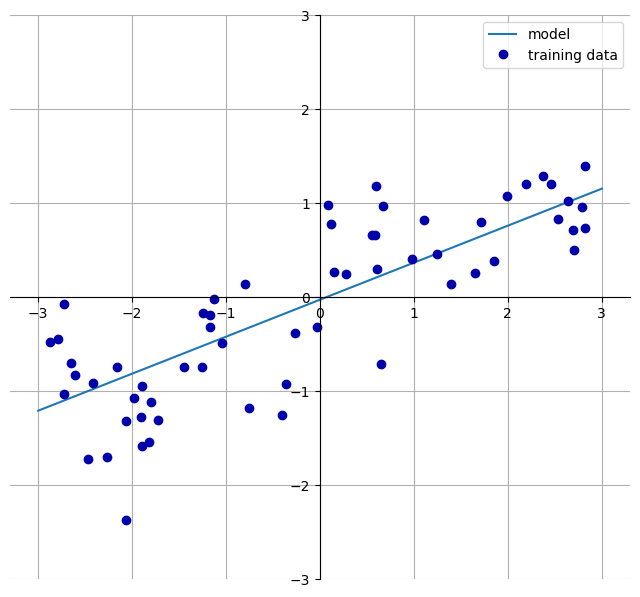

In [3]:
mglearn.plots.plot_linear_regression_wave()

We added a coordinate cross into the plot to make it easier to understand the line.
Looking at w[0] we see that the slope should be around 0.4, which we can confirm
visually in the plot. The intercept is where the prediction line should cross the y-axis:
this is slightly below zero, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyper‐
plane in higher dimensions (that is, when using more features).


### Linear regression (aka ordinary least squares)

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set. The mean squared error is the sum of the squared differences
between the predictions and the true values. Linear regression has no parameters,
which is a benefit, but it also has no way to control model complexity.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


You might notice the strange-looking trailing underscore at the end
of coef_ and intercept_. scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.

The intercept_ attribute is always a single float number, while the coef_ attribute is
a NumPy array with one entry per input feature. As we only have a single input fea‐
ture in the wave dataset, lr.coef_ only has a single entry.


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R
2
 of around 0.66 is not very good, but we can see that the scores on the training
and test sets are very close together. This means we are likely underfitting, not over‐
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more pow‐
erful, and there is a higher chance of overfitting. Let’s take a look at how LinearRe
gression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regres‐
sion model as before:


In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

When comparing training set and test set scores, we find that we predict very accurately on the training set, but the R
2
 on the test set is much worse:

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to con‐
trol complexity. One of the most commonly used alternatives to standard linear
regression is ridge regression, which we will look into next.


### Ridge regression

In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint. We also want the magnitude of coef‐
ficients to be as small as possible; in other words, all entries of w should be close to
zero. Intuitively, this means each feature should have as little effect on the outcome as
possible (which translates to having a small slope), while still predicting well. This
constraint is an example of what is called regularization. Regularization means explic‐
itly restricting a model to avoid overfitting. The particular kind used by ridge regres‐
sion is known as L2 regularization.7

Ridge regression is implemented in linear_model.Ridge. Let’s see how well it does
on the extended Boston Housing dataset:


In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


- training set score of Ridge is lower than for LinearRegression, while the test set score is higher.
- A less complex model means worse performance on the training set, but better generalization. 

The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. For example:


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [12]:
# Generate alpha values from 10 to 0.1 with a step of -0.1
alpha_values = np.arange(10, 0, -0.1)

for alpha in alpha_values:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    print(f"Alpha: {alpha:.1f}, Training set score: {train_score:.2f}, Test set score: {test_score:.2f}")

Alpha: 10.0, Training set score: 0.79, Test set score: 0.64
Alpha: 9.9, Training set score: 0.79, Test set score: 0.64
Alpha: 9.8, Training set score: 0.79, Test set score: 0.64
Alpha: 9.7, Training set score: 0.79, Test set score: 0.64
Alpha: 9.6, Training set score: 0.79, Test set score: 0.64
Alpha: 9.5, Training set score: 0.79, Test set score: 0.64
Alpha: 9.4, Training set score: 0.79, Test set score: 0.64
Alpha: 9.3, Training set score: 0.79, Test set score: 0.64
Alpha: 9.2, Training set score: 0.79, Test set score: 0.64
Alpha: 9.1, Training set score: 0.79, Test set score: 0.64
Alpha: 9.0, Training set score: 0.79, Test set score: 0.64
Alpha: 8.9, Training set score: 0.79, Test set score: 0.64
Alpha: 8.8, Training set score: 0.79, Test set score: 0.64
Alpha: 8.7, Training set score: 0.80, Test set score: 0.65
Alpha: 8.6, Training set score: 0.80, Test set score: 0.65
Alpha: 8.5, Training set score: 0.80, Test set score: 0.65
Alpha: 8.4, Training set score: 0.80, Test set score: 0

In [13]:
ridge005 = Ridge(alpha=0.05).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge005.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge005.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.76


We can also get a more qualitative insight into how the alpha parameter changes the
model by inspecting the coef_ attribute of models with different values of alpha. A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha. This
is confirmed in the plot in Figure 2-12:


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

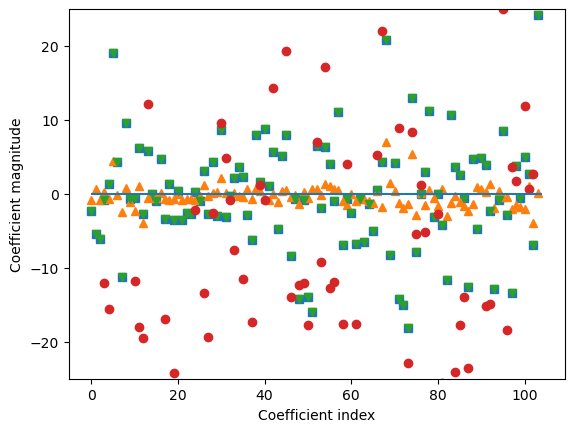

In [14]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label= "Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label = "Ridge alpha = 0.1")
plt.plot(lr.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend


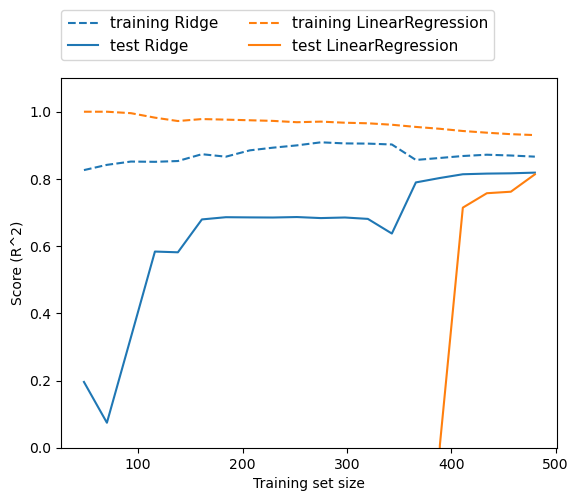

In [15]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and
linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance). Another interesting aspect of
Figure 2-13 is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.

### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8
 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero.

## This means some features are entirely ignored by the model.

This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ != 0)))

Trainig set score: 0.29
Test set score: 0.21
Number of feature used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run):


In [17]:
# we increase the default setting of "max_iter"1.ipynb
# otherwise the model would warn us that we should increase max_iter
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of feature used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to under‐
stand.

If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:


In [18]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of feature used: 96


Text(0, 0.5, 'Coef magnitude')

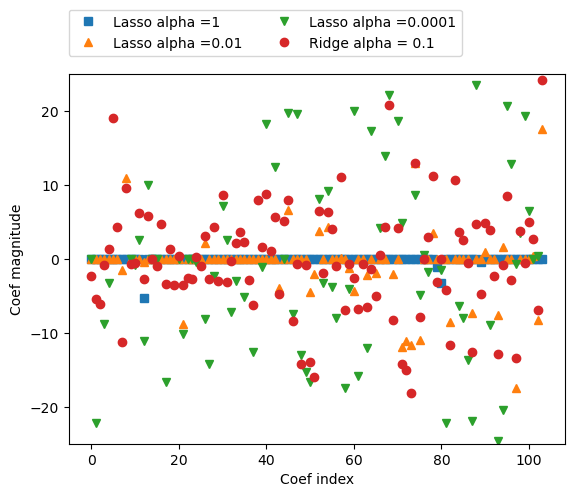

In [20]:
plt.plot(lasso.coef_, 's', label = "Lasso alpha =1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha =0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha =0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")
plt.legend(ncol = 2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coef index")
plt.ylabel("Coef magnitude")

For alpha=1, we not only see that most of the coefficients are zero (which we already
knew), but that the remaining coefficients are also small in magnitude. Decreasing
alpha to 0.01, we obtain the solution shown as the green dots, which causes most
features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregu‐
larized, with most coefficients nonzero and of large magnitude. For comparison, the
best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar
predictive performance as the lasso model with alpha=0.01, but using Ridge, all coef‐
ficients are nonzero.

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.
